In [5]:
# loading the necessary libraries that will be used.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#reading the needed csv file from the local storage using the .read function
flavour = pd.read_csv("flavors_of_cacao-1.csv")

In [7]:
# displaying the dataframe called flavour.
flavour

,Company??\n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,??,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,??,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,??,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,??,Togo
4,A. Morin,Quilla,1704,2015,70%,France,0.00,??,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,??,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,??,India


In [9]:
#perfomring exploratory data analysis means scrutinizing the data to get adequate information about the dataset you are working with.
#lets take a look at the the summary statistics of this dataset
#first, using the shape function to see the shape of the dataset at shape(0) and shape(1) thus shape at the rows and columns respectively.
print("Number of Instance of this dataset is : ", flavour.shape[0])
print("Number of Features of this dataset is : ", flavour.shape[1])

Number of Instance of this dataset is :  1795
Number of Features of this dataset is :  9


In [12]:
#checking for the summary statistics, we use the describe function
print("\nSummary Statistics: ")
flavour.describe()


Summary Statistics: 


,REF,Review\nDate,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.183983
std,552.886365,2.927210,0.483883
min,5.000000,2006.000000,0.000000
25%,576.000000,2010.000000,2.750000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [13]:
# Check for missing data
flavour.isnull().sum()

Company??\n(Maker-if known)          0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

In [15]:
#inspecting the feature names
flavour.dtypes

Company??\n(Maker-if known)           object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

In [17]:
#rename some columns header
old_columns = flavour.columns
new_columns = ['Company Name','Specific Bean Origin', 'REF', 'Review Year', 'Cocoa Percent', 'Company Location', 'Rating', 'Bean Type', 'Country']

flavour = flavour.rename(columns=dict(zip(old_columns, new_columns)))
flavour

,Company Name,Specific Bean Origin,REF,Review Year,Cocoa Percent,Company Location,Rating,Bean Type,Country
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,??,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,??,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,??,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,??,Togo
4,A. Morin,Quilla,1704,2015,70%,France,0.00,??,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,??,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,??,India


In [19]:
#checking out if we have missing values
flavour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company Name          1795 non-null   object 
 1   Specific Bean Origin  1795 non-null   object 
 2   REF                   1795 non-null   int64  
 3   Review Year           1795 non-null   int64  
 4   Cocoa Percent         1795 non-null   object 
 5   Company Location      1795 non-null   object 
 6   Rating                1795 non-null   float64
 7   Bean Type             1794 non-null   object 
 8   Country               1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [20]:
# looking at our dataset, there seem to be ?? in some of the fields hence, replacing fields with ?? with an empty space suing the replace function
flavour.replace('??', '', inplace=True)

#printing the first 8 entries using the head function
flavour.head(8)

,Company Name,Specific Bean Origin,REF,Review Year,Cocoa Percent,Company Location,Rating,Bean Type,Country
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,0.00,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela


In [23]:
flavour[['Bean Type', 'Country']].head()

,Bean Type,Country
0,,Sao Tome
1,,Togo
2,,Togo
3,,Togo
4,,Peru


In [25]:
#looking at the output above, there are a lot of spaces in the Bean Type field hence, let's take much look into it
print(flavour['Bean Type'].value_counts().head())
print("Missing Spaces encoded as:")
list(flavour['Bean Type'][0:10])

                        887
Trinitario              419
Criollo                 153
Forastero                87
Forastero (Nacional)     52
Name: Bean Type, dtype: int64
Missing Spaces encoded as:


['', '', '', '', '', 'Criollo', '', 'Criollo', 'Criollo', '']

In [26]:
# looking at the output above again, there are 887 instances that are empty

In [27]:
#since the empty spaces are a lot, let us replace these with none
flavour['Bean Type'] = flavour['Bean Type'].replace('','None', inplace=True)
flavour.head()

,Company Name,Specific Bean Origin,REF,Review Year,Cocoa Percent,Company Location,Rating,Bean Type,Country
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,None,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,None,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,None,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,None,Togo
4,A. Morin,Quilla,1704,2015,70%,France,0.00,None,Peru


In [28]:
#looking at the Cocoa Percent with the % sign, might be a problem later, hence converting it to a float
flavour['Cocoa Percent']=flavour['Cocoa Percent'].str.replace('%','').astype(float)/100
flavour.head()

,Company Name,Specific Bean Origin,REF,Review Year,Cocoa Percent,Company Location,Rating,Bean Type,Country
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,None,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,None,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,None,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,None,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,0.00,None,Peru


In [29]:
#number of reviews per year
review_yr = flavour['Review Year'].value_counts()
review_yr

2015    285
2014    247
2016    219
2012    195
2013    184
2011    165
2009    123
2010    111
2008     93
2007     77
2006     72
2017     24
Name: Review Year, dtype: int64

In [30]:
#top ten cocoa producting countries
flavour['Country'].value_counts().head(10)

Venezuela             214
Ecuador               193
Peru                  165
Madagascar            145
Dominican Republic    141
                       73
Nicaragua              60
Brazil                 58
Bolivia                57
Belize                 49
Name: Country, dtype: int64

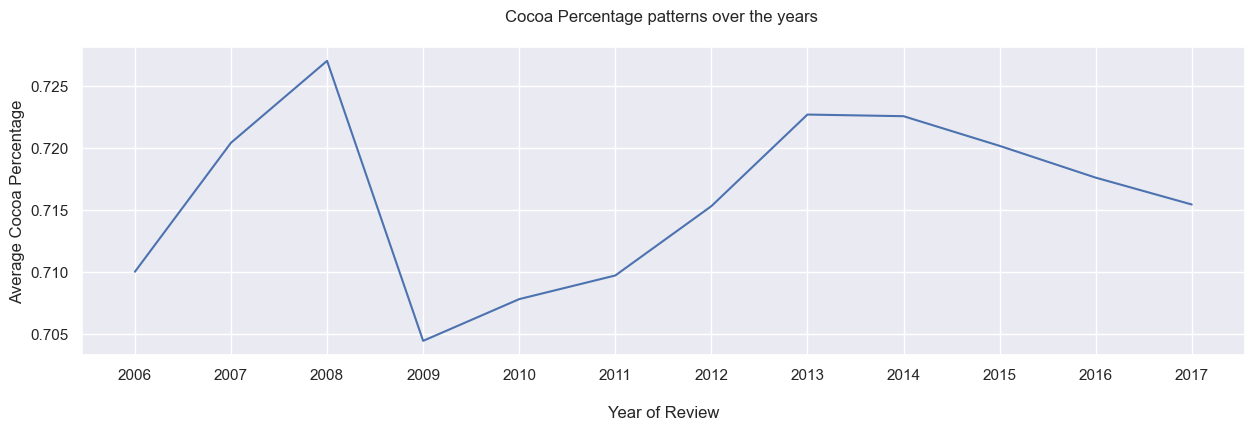

In [43]:
# Cocoa Percentage patterns over the years

d5 = flavour.groupby('Review Year').aggregate({'Cocoa Percent':'mean'})
d5 = d5.reset_index()
# Plotting
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='Review Year', y='Cocoa Percent', data=d5)
ax.set_xticks(d5['Review Year'].values)
plt.xlabel("\nYear of Review")
plt.ylabel("Average Cocoa Percentage")
plt.title("Cocoa Percentage patterns over the years \n")
plt.show()


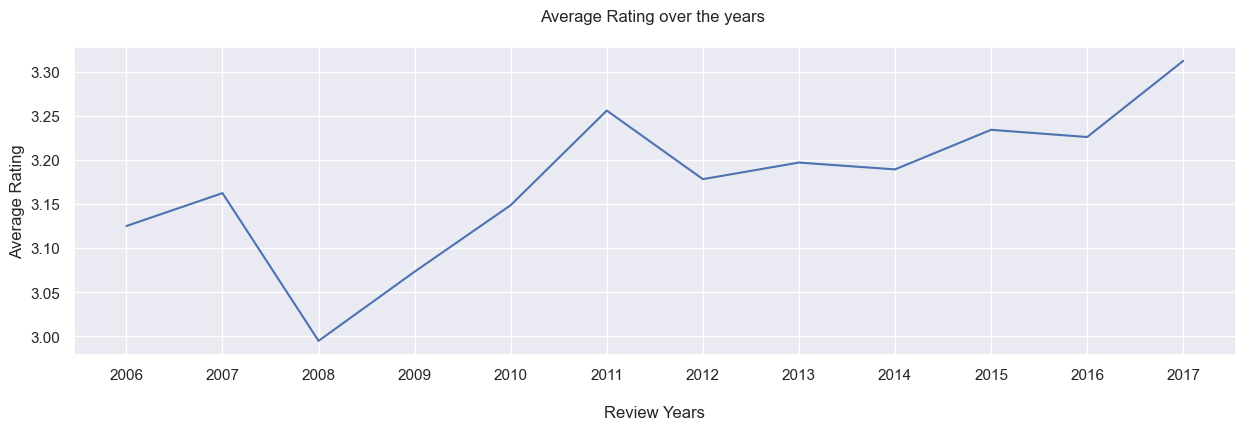

In [46]:
# Rating patterns over the years

d6 = flavour.groupby('Review Year').aggregate({'Rating':'mean'})
d6 = d6.reset_index()

# Plotting
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='Review Year', y='Rating', data=d6)
ax.set_xticks(d6['Review Year'].values)
plt.xlabel("\nReview Years")
plt.ylabel("Average Rating")
plt.title("Average Rating over the years \n")
plt.show()

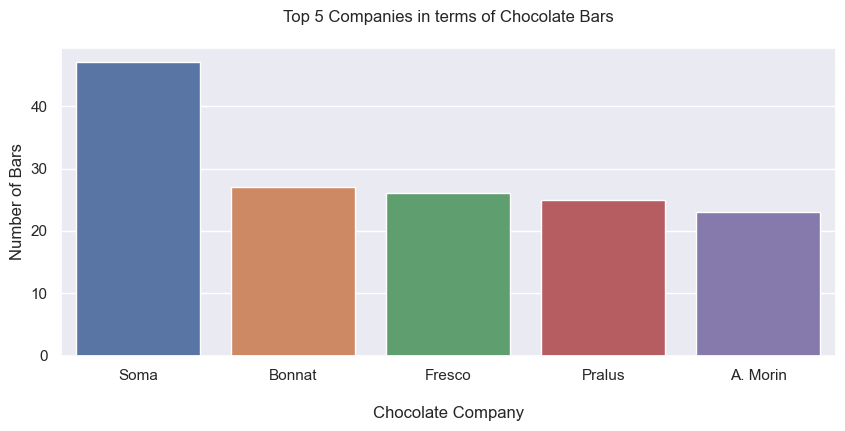

In [54]:
# Top 5 companies names in terms of chocolate bars in this dataset
top_5 = flavour['Company Name'].value_counts().sort_values(ascending=False).head(5)
top_5 = pd.DataFrame(top_5)
top_5 = top_5.reset_index() # dataframe with top 5 companies

# Plotting
sns.set()
plt.figure(figsize=(10,4))
by = sns.barplot(x='index', y='Company Name', data=top_5)
plt.xlabel("\nChocolate Company")
plt.ylabel("Number of Bars")
plt.title("Top 5 Companies in terms of Chocolate Bars\n")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


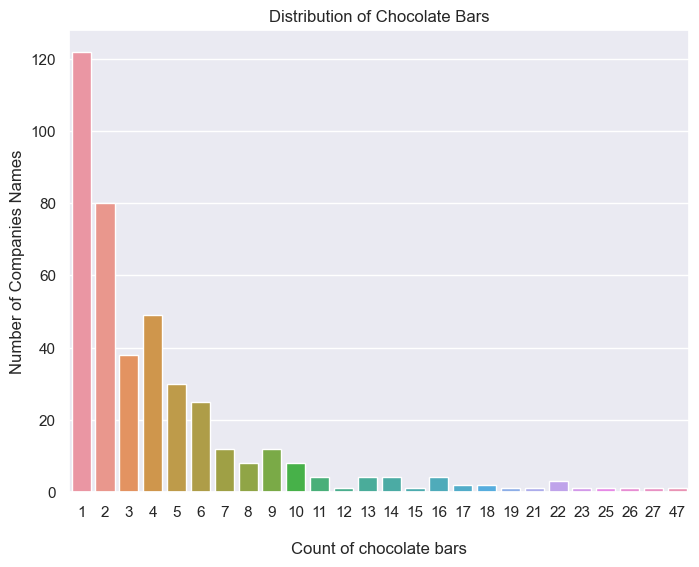

In [56]:
# Distribution of Chocolate Bars
sns.set()
plt.figure(figsize=(8,6))
sns.countplot(flavour['Company Name'].value_counts().sort_values(ascending=False))
plt.xlabel("\nCount of chocolate bars")
plt.ylabel("Number of Companies Names")
plt.title("Distribution of Chocolate Bars")
plt.show()


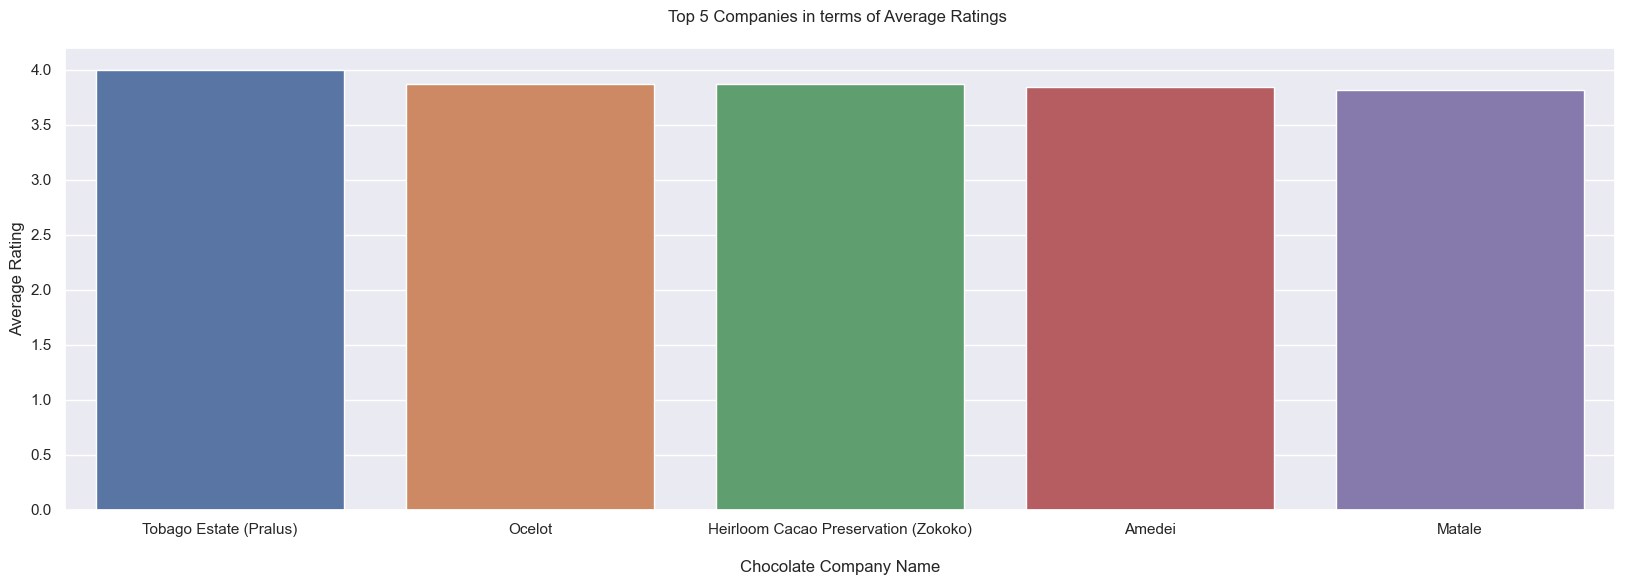

In [58]:
# Top 5 companies names in terms of average ratings
d2 = flavour.groupby('Company Name').aggregate({'Rating':'mean'})
d2 = d2.sort_values('Rating', ascending=False).head(5)
d2 = d2.reset_index()

# Plotting
sns.set()
plt.figure(figsize=(20, 6))
sns.barplot(x='Company Name', y='Rating', data=d2)
plt.xlabel("\nChocolate Company Name")
plt.ylabel("Average Rating")
plt.title("Top 5 Companies in terms of Average Ratings \n")
plt.show()

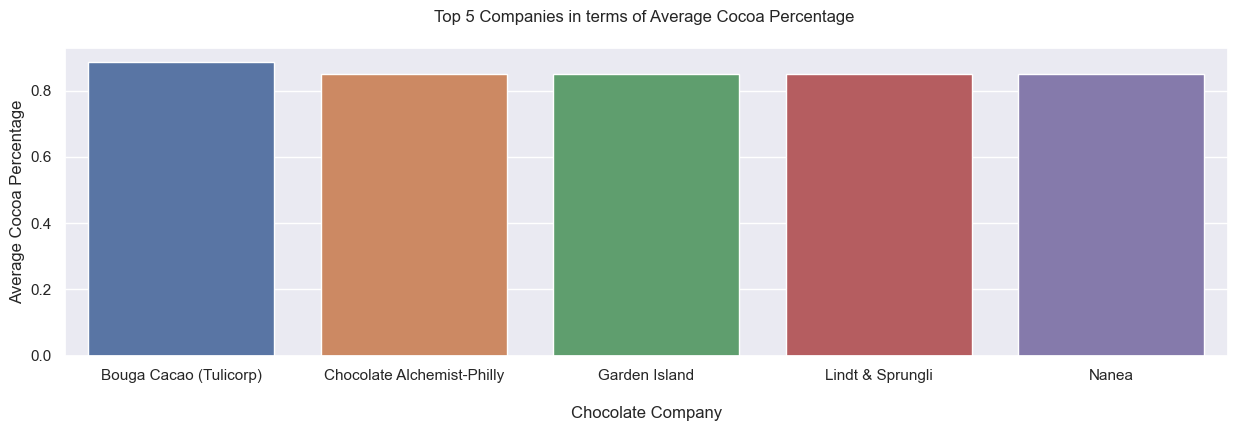

In [60]:
# Top 5 companies names in terms of average Cocoa Percentage
d2 = flavour.groupby('Company Name').aggregate({'Cocoa Percent':'mean'})
d2 = d2.sort_values('Cocoa Percent', ascending=False).head(5)
d2 = d2.reset_index()

# Plotting
sns.set()
plt.figure(figsize=(15, 4))
sns.barplot(x='Company Name', y='Cocoa Percent', data=d2)
plt.xlabel("\nChocolate Company")
plt.ylabel("Average Cocoa Percentage")
plt.title("Top 5 Companies in terms of Average Cocoa Percentage \n")
plt.show()

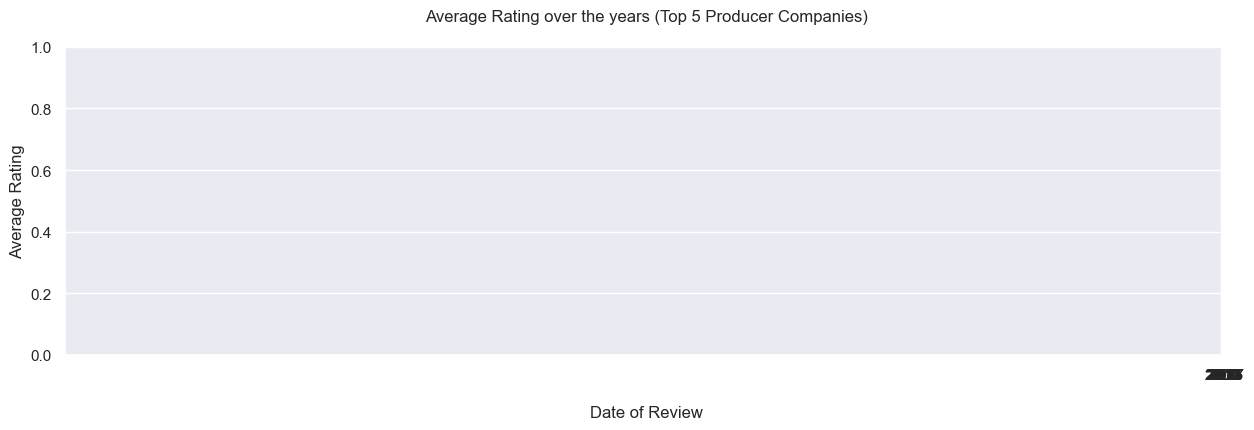

In [80]:
# Average rating over the years (Top 5)

top5_dict = {element: flavour[flavour['Company Name']==element] for element in list(['index'])}
top5_list = list(top5_dict.keys())


### Rating patterns over the years
d7 = flavour.groupby(['Review Year', 'Company Name']).aggregate({'Rating':'mean'})
d7 = d7.reset_index()
d7 = d7[d7['Company Name'].isin(top5_list)]

# Plotting
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='Review Year', y='Rating', hue="Company Name", data=d7, palette="husl")
ax.set_xticks(d6['Review Year'].values)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Rating")
plt.title("Average Rating over the years (Top 5 Producer Companies)\n")
plt.show()

In [91]:
# Preparing Soma for analysis
soma = flavour[flavour['Company Name']=='Soma']

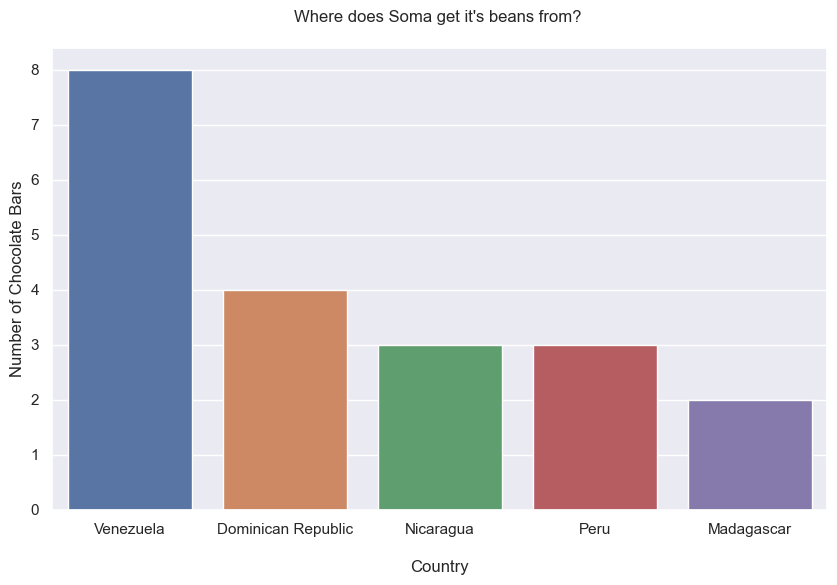

In [92]:
# Where does Soma get it's beans from ?

d3 = soma['Country'].value_counts().sort_values(ascending=False).head(5)
d3 = pd.DataFrame(d3)
d3 = d3.reset_index()
# Plotting
sns.set()
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='Country', data=d3)
plt.xlabel("\nCountry")
plt.ylabel("Number of Chocolate Bars")
plt.title("Where does Soma get it's beans from? \n")
plt.show()

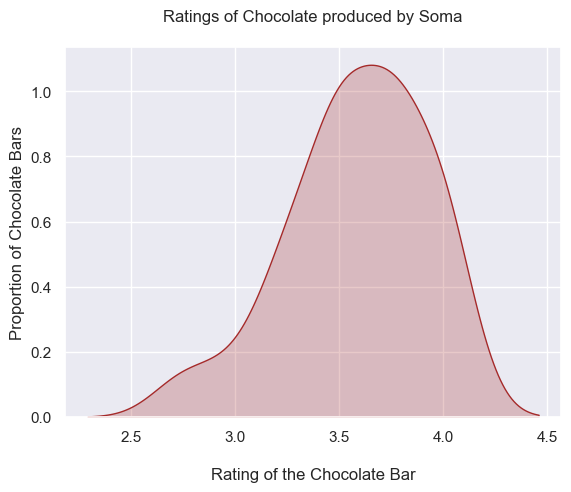

In [88]:
sns.kdeplot(soma['Rating'], legend=False, color="brown", shade=True)
plt.xlabel("\nRating of the Chocolate Bar")
plt.ylabel("Proportion of Chocolate Bars")
plt.title("Ratings of Chocolate produced by Soma\n")
plt.show()

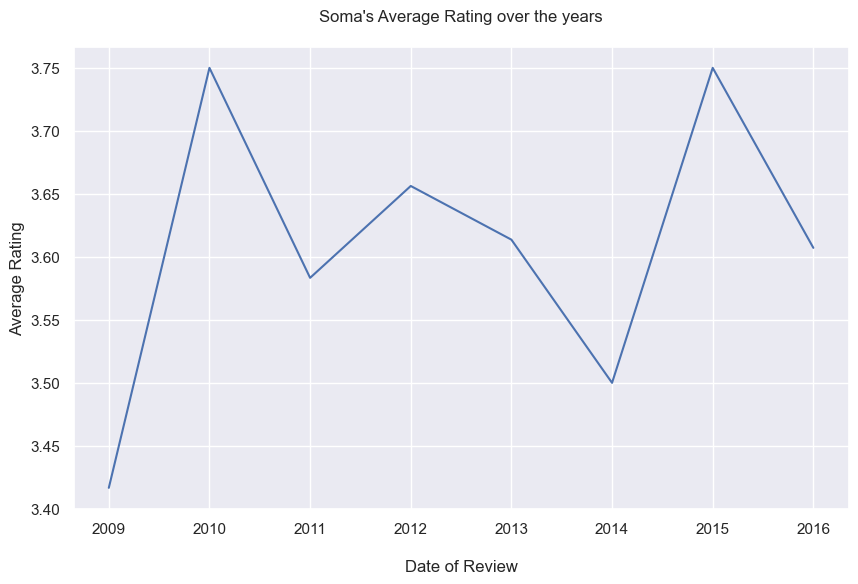

In [85]:
### Soma's performance over the years
d4 = soma.groupby('Review Year').aggregate({'Rating':'mean'})
d4 = d4.reset_index()
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Review Year', y='Rating', data=d4)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Rating")
plt.title("Soma's Average Rating over the years\n")
plt.show()

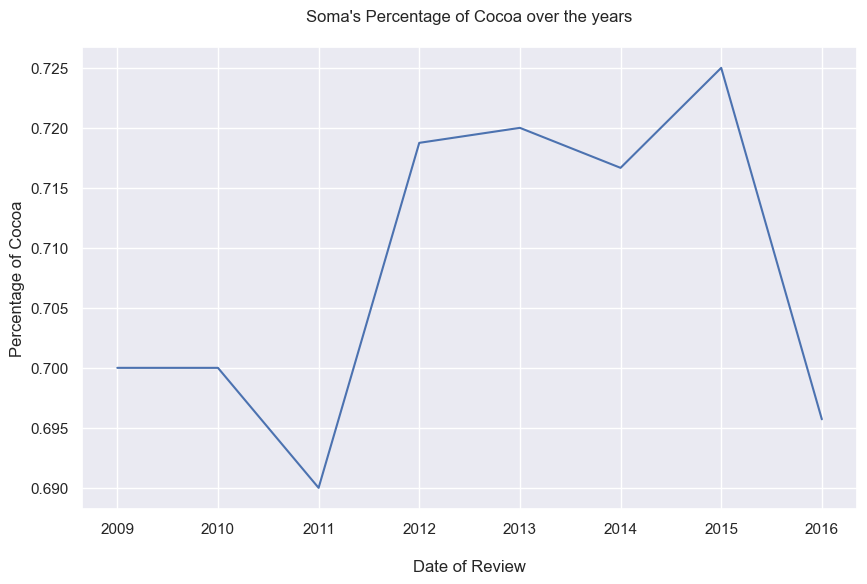

In [86]:
# Soma's performance over the years
d4 = soma.groupby('Review Year').aggregate({'Cocoa Percent':'mean'})
d4 = d4.reset_index()
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Review Year', y='Cocoa Percent', data=d4)
plt.xlabel("\nDate of Review")
plt.ylabel("Percentage of Cocoa")
plt.title("Soma's Percentage of Cocoa over the years\n")
plt.show()

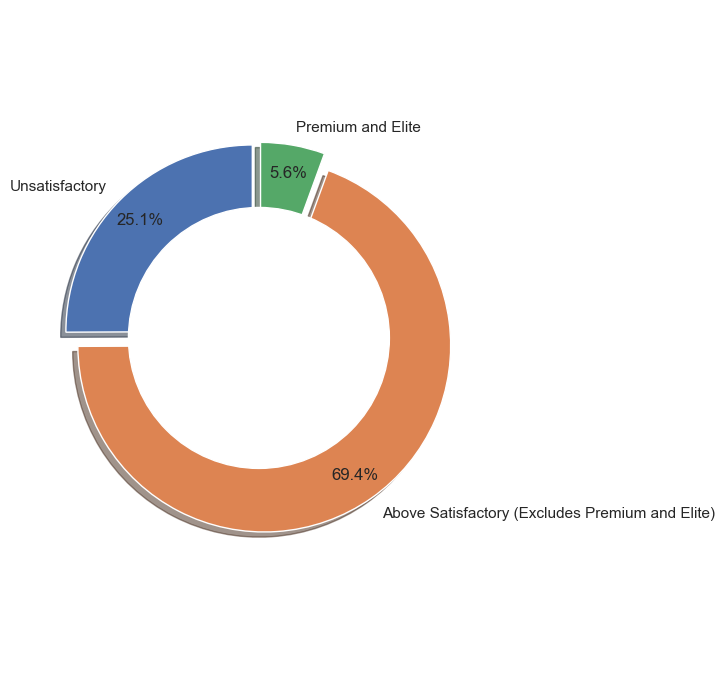

In [93]:
# Chocolate Bar levels

unsatisfactory = flavour[flavour['Rating'] < 3.0]
satisfactory = flavour[(flavour['Rating'] >= 3.0) & (flavour.Rating < 4)]
pre_elite = flavour[flavour['Rating'] >= 4.0]
label_names=['Unsatisfactory','Above Satisfactory (Excludes Premium and Elite)','Premium and Elite']
sizes = [unsatisfactory.shape[0],satisfactory.shape[0],pre_elite.shape[0]]
# Now let's make the donut plot
explode = (0.05,0.05,0.05)
my_circle=plt.Circle((0,0),0.7,color='white')
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=label_names,explode=explode,autopct='%1.1f%%',pctdistance=0.85,startangle=90,shadow=True)
fig=plt.gcf()
fig.gca().add_artist(my_circle)
plt.axis('equal')
plt.tight_layout()
plt.show()

Rating: 3.5 Reviews: 391
Rating: 3.0 Reviews: 341
Rating: 3.25 Reviews: 303
Rating: 2.75 Reviews: 259
Rating: 3.75 Reviews: 210
Rating: 2.5 Reviews: 127
Rating: 4.0 Reviews: 98
Rating: 2.0 Reviews: 32
Rating: 2.25 Reviews: 14
Rating: 1.5 Reviews: 10
Rating: 1.0 Reviews: 4
Rating: 1.75 Reviews: 3
Rating: 5.0 Reviews: 2
Rating: 0.0 Reviews: 1


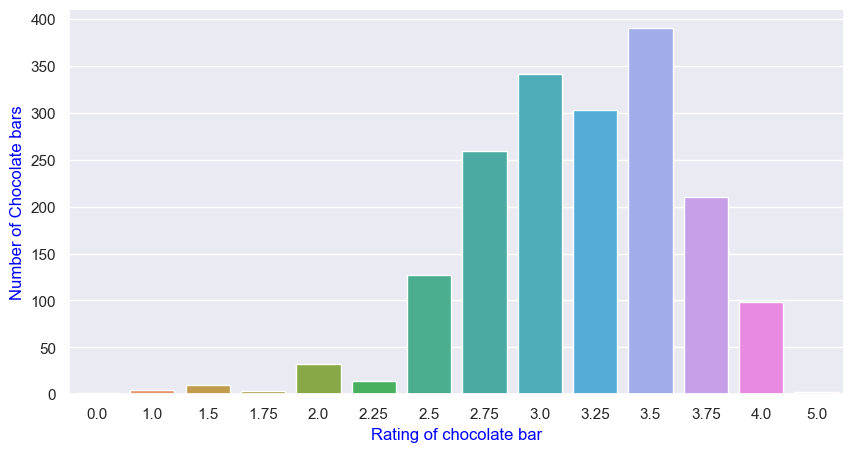

In [97]:
#The counts of each rating

r=list(flavour['Rating'].value_counts())
rating=flavour['Rating'].value_counts().index.tolist()
rat=dict(zip(rating,r))
for key,val in rat.items():
    print ('Rating:',key,'Reviews:',val)
plt.figure(figsize=(10,5))
sns.countplot(x='Rating',data=flavour)
plt.xlabel('Rating of chocolate bar',size=12,color='blue')
plt.ylabel('Number of Chocolate bars',size=12,color='blue')
plt.show()

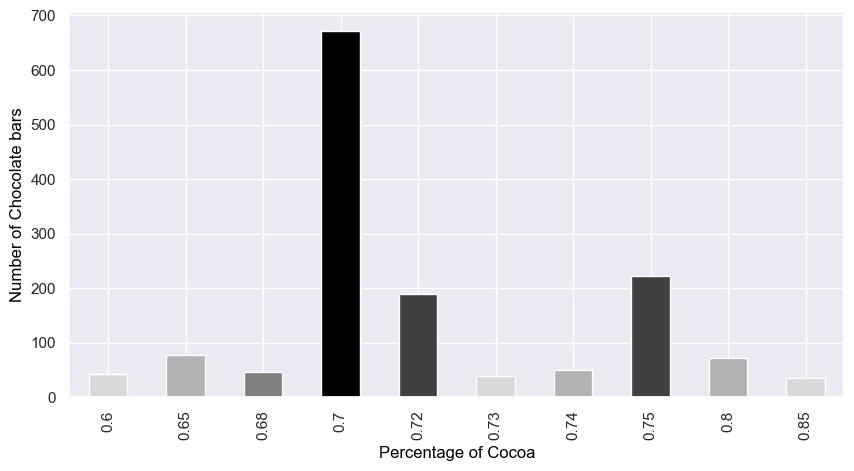

In [99]:
# Cocoa percent and choco bars

plt.figure(figsize=(10,5))
flavour['Cocoa Percent'].value_counts().head(10).sort_index().plot.bar(color=['#d9d9d9','#b3b3b3','#808080','#000000','#404040','#d9d9d9','#b3b3b3','#404040','#b3b3b3'])
plt.xlabel('Percentage of Cocoa',size=12,color='black')
plt.ylabel('Number of Chocolate bars',size=12,color='black')
plt.show()

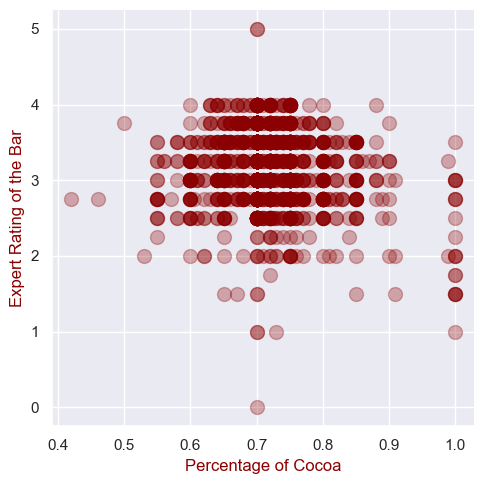

In [101]:
# Cocoa Percent and Rating

sns.lmplot(x='Cocoa Percent',y='Rating',fit_reg=False,scatter_kws={"color":"darkred","alpha":0.3,"s":100},data=flavour)
plt.xlabel('Percentage of Cocoa',size=12,color='darkred')
plt.ylabel('Expert Rating of the Bar',size=12,color='darkred')
plt.show()

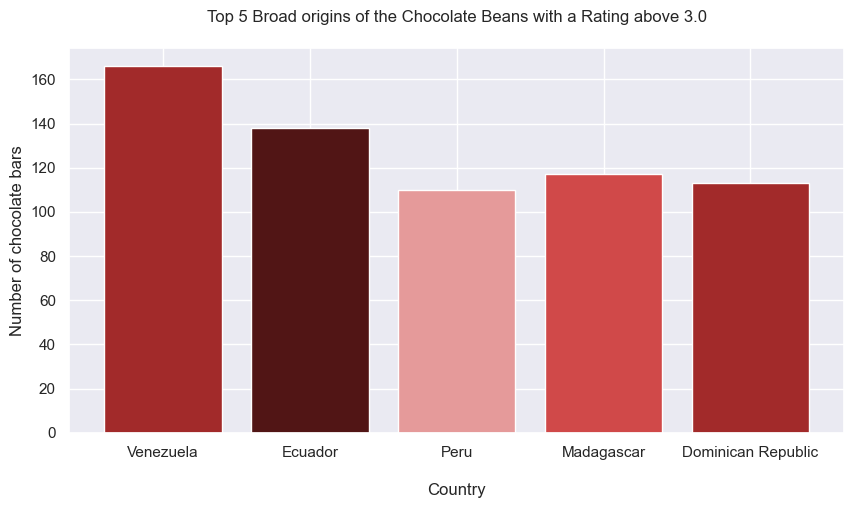

In [102]:
#to get the indices
countries=flavour['Country'].value_counts().index.tolist()[:5]
# countries has the top 5 countries in terms of reviews
satisfactory={} # empty dictionary
for j in countries:
    c=0
    b=flavour[flavour['Country']==j]
    br=b[b['Rating']>=3] # rating more than 4
    for i in br['Rating']:
        c+=1
        satisfactory[j]=c    

# Code to visualize the countries that give best cocoa beans
li=satisfactory.keys()
plt.figure(figsize=(10,5))
plt.bar(range(len(satisfactory)), satisfactory.values(), align='center',color=['#a22a2a','#511515','#e59a9a','#d04949','#a22a2a'])
plt.xticks(range(len(satisfactory)), list(li))
plt.xlabel('\nCountry')
plt.ylabel('Number of chocolate bars')
plt.title("Top 5 Broad origins of the Chocolate Beans with a Rating above 3.0\n")
plt.show()


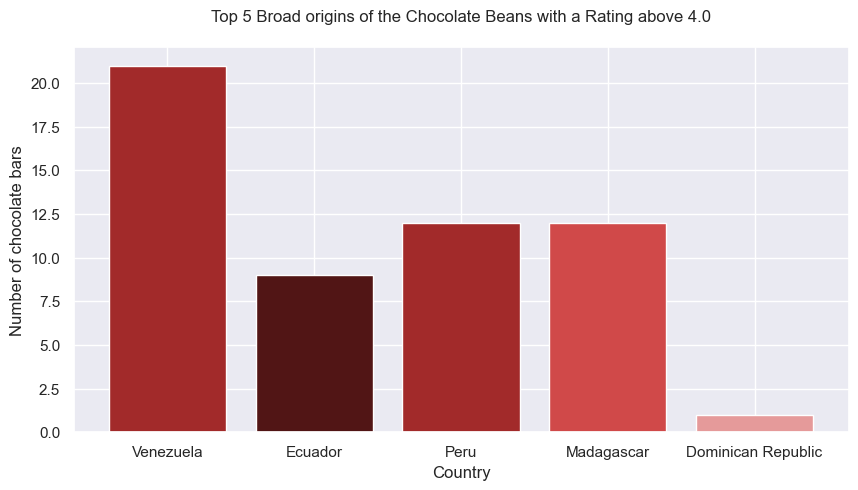

{'Venezuela': 21, 'Ecuador': 9, 'Peru': 12, 'Madagascar': 12, 'Dominican Republic': 1}


In [103]:
#to get the indices
countries=flavour['Country'].value_counts().index.tolist()[:5]
# countries has the top 5 countries in terms of reviews
best_choc={} # empty dictionary
for j in countries:
    c=0
    b=flavour[flavour['Country']==j]
    br=b[b['Rating']>=4] # rating more than 4
    for i in br['Rating']:
        c+=1
        best_choc[j]=c 

# Code to visualize the countries that give best cocoa beans
li=best_choc.keys()
plt.figure(figsize=(10,5))
plt.bar(range(len(best_choc)), best_choc.values(), align='center',color=['#a22a2a','#511515','#a22a2a','#d04949','#e59a9a'])
plt.xticks(range(len(best_choc)), list(li))
plt.xlabel('Country')
plt.ylabel('Number of chocolate bars')
plt.title("Top 5 Broad origins of the Chocolate Beans with a Rating above 4.0\n")
plt.show()

print(best_choc)

Top Chocolate Producing Countries in the World

U.S.A.    764
France    156
Canada    125
U.K.       96
Italy      63
Name: Company Location, dtype: int64


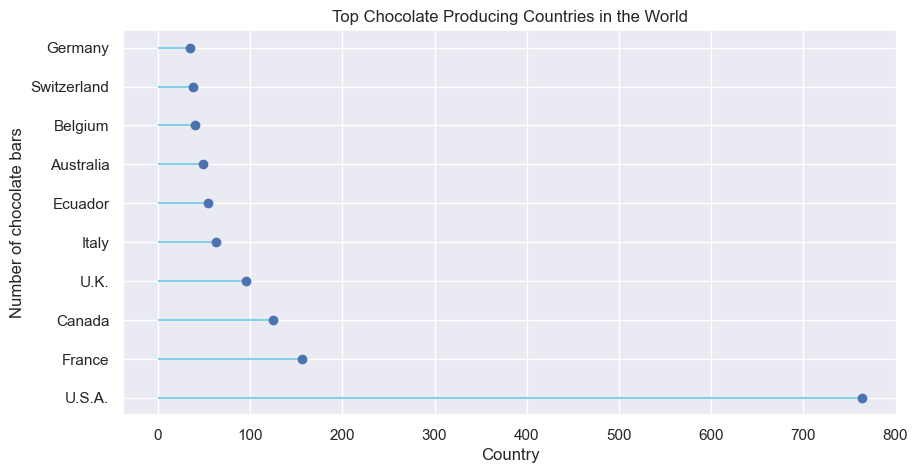

In [105]:
# Countries

print ('Top Chocolate Producing Countries in the World\n')
country=list(flavour['Company Location'].value_counts().head(10).index)
choco_bars=list(flavour['Company Location'].value_counts().head(10))
prod_ctry=dict(zip(country,choco_bars))
print(flavour['Company Location'].value_counts().head())

plt.figure(figsize=(10,5))
plt.hlines(y=country,xmin=0,xmax=choco_bars,color='skyblue')
plt.plot(choco_bars,country,"o")
plt.xlabel('Country')
plt.ylabel('Number of chocolate bars')
plt.title("Top Chocolate Producing Countries in the World")
plt.show()

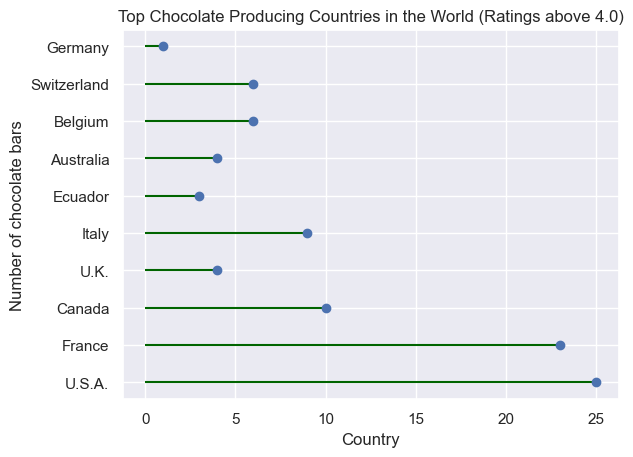

{'U.S.A.': 25, 'France': 23, 'Canada': 10, 'U.K.': 4, 'Italy': 9, 'Ecuador': 3, 'Australia': 4, 'Belgium': 6, 'Switzerland': 6, 'Germany': 1}


In [107]:
#reusing code written before
countries=country
best_choc={} # empty dictionary
for j in countries:
    c=0
    b=flavour[flavour['Company Location']==j]
    br=b[b['Rating']>=4] # rating more than 4
    for i in br['Rating']:
        c+=1
        best_choc[j]=c    
# Code to visualize the countries that produce the best choclates

li=best_choc.keys()
# The lollipop plot
plt.hlines(y=li,xmin=0,xmax=best_choc.values(),color='darkgreen')
plt.plot(best_choc.values(),li,"o")
plt.xlabel('Country')
plt.ylabel('Number of chocolate bars')
plt.title("Top Chocolate Producing Countries in the World (Ratings above 4.0)")
plt.show()
print(best_choc)